# Kaggle Dataset Import and Cleaning

In this notebook, we aim to import, clean and explore a dataset imported from kaggle to build a model that categorizes a tweet as 'urgent'. We define urgent as whether or not a tweet is truly about a natural disaster.

## Import Data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

In [3]:
df = pd.read_csv('./socialmedia-disaster-tweets.csv', encoding='latin-1')

In [4]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,choose_one,choose_one:confidence,choose_one_gold,keyword,location,text,tweetid,userid
0,778243823,True,golden,156,NaN,Relevant,1.0000,Relevant,NaN,NaN,Just happened a terrible car crash,1.0,NaN
1,778243824,True,golden,152,NaN,Relevant,1.0000,Relevant,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,13.0,NaN
2,778243825,True,golden,137,NaN,Relevant,1.0000,Relevant,NaN,NaN,"Heard about #earthquake is different cities, s...",14.0,NaN
3,778243826,True,golden,136,NaN,Relevant,0.9603,Relevant,NaN,NaN,"there is a forest fire at spot pond, geese are...",15.0,NaN
4,778243827,True,golden,138,NaN,Relevant,1.0000,Relevant,NaN,NaN,Forest fire near La Ronge Sask. Canada,16.0,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10876 entries, 0 to 10875
Data columns (total 13 columns):
_unit_id                 10876 non-null int64
_golden                  10876 non-null bool
_unit_state              10876 non-null object
_trusted_judgments       10876 non-null int64
_last_judgment_at        10792 non-null object
choose_one               10876 non-null object
choose_one:confidence    10876 non-null float64
choose_one_gold          87 non-null object
keyword                  10789 non-null object
location                 7238 non-null object
text                     10876 non-null object
tweetid                  10876 non-null float64
userid                   10789 non-null float64
dtypes: bool(1), float64(3), int64(2), object(7)
memory usage: 1.0+ MB


In [6]:
df._unit_state.value_counts()

finalized    10789
golden          87
Name: _unit_state, dtype: int64

In [7]:
df._golden.value_counts()

False    10792
True        84
Name: _golden, dtype: int64

(array([1.0792e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.1000e+01, 2.6000e+01, 2.0000e+00, 2.1000e+01, 2.4000e+01]),
 array([  3. ,  18.4,  33.8,  49.2,  64.6,  80. ,  95.4, 110.8, 126.2,
        141.6, 157. ]),
 <a list of 10 Patch objects>)

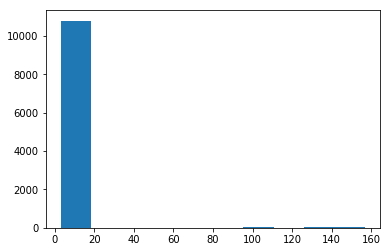

In [8]:
plt.hist(df._trusted_judgments)

In [9]:
df._last_judgment_at.dropna().head()

46    8/26/15 15:56
47    8/28/15 19:14
48     8/29/15 1:27
49    8/26/15 16:31
50    8/26/15 17:19
Name: _last_judgment_at, dtype: object

In [10]:
df.choose_one.value_counts() #Make ordinal

Not Relevant    6187
Relevant        4673
Can't Decide      16
Name: choose_one, dtype: int64

In [11]:
df['choose_one:confidence'].head()

0    1.0000
1    1.0000
2    1.0000
3    0.9603
4    1.0000
Name: choose_one:confidence, dtype: float64

In [12]:
df.choose_one_gold.value_counts()

Relevant                      57
Not Relevant                  24
Relevant\rCan't Decide         4
Not Relevant\rCan't Decide     2
Name: choose_one_gold, dtype: int64

In [13]:
df.keyword.value_counts().head()

electrocuted             50
buildings%20on%20fire    50
fire%20truck             50
drowned                  50
curfew                   50
Name: keyword, dtype: int64

In [14]:
df.location.value_counts().dropna().sum()

7238

In [15]:
df.text.head() #actual tweet

0                   Just happened a terrible car crash
1    Our Deeds are the Reason of this #earthquake M...
2    Heard about #earthquake is different cities, s...
3    there is a forest fire at spot pond, geese are...
4               Forest fire near La Ronge Sask. Canada
Name: text, dtype: object

In [16]:
df.rename({'choose_one:confidence': 'confidence'}, axis=1, inplace=True)

In [17]:
df.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'choose_one', 'confidence', 'choose_one_gold',
       'keyword', 'location', 'text', 'tweetid', 'userid'],
      dtype='object')

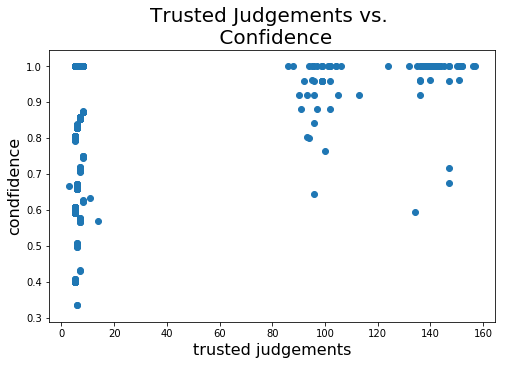

In [18]:
plt.figure(figsize = (8, 5))
plt.scatter(df._trusted_judgments, df.confidence)
plt.title(label = 'Trusted Judgements vs. \n Confidence', fontsize = 20)
plt.xlabel('trusted judgements', fontsize = 16)
plt.ylabel('condfidence', fontsize = 16);

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
_unit_id,10876.0,7.782503e+08,3.200574e+03,7.782438e+08,7.782475e+08,7.782503e+08,7.782530e+08,7.782611e+08
_trusted_judgments,10876.0,6.022527e+00,1.046383e+01,3.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,1.570000e+02
confidence,10876.0,8.420367e-01,1.680865e-01,3.342000e-01,7.149000e-01,8.049000e-01,1.000000e+00,1.000000e+00
tweetid,10876.0,6.238791e+17,5.602753e+16,1.000000e+00,6.290000e+17,6.290000e+17,6.290000e+17,6.290000e+17
userid,10789.0,1.231422e+09,1.167599e+09,3.840000e+03,1.870027e+08,6.342173e+08,2.416228e+09,3.404474e+09


Process:
- Determine what to use as target variable (confidence can be turned into a binary or we can predict confidence from 0 to 1).
- We want to first use natural language processing to build model
- Depending on the score of that we might be able to use more numeric columns. However, it seems like the confidence metric is determined by the number of trusted judgements, and how many say 'yes' and how many say 'no'. May be best to stick with tweet content. 
- Utilize datetime

In [20]:
df._last_judgment_at.fillna('0/00/00 00:00', inplace=True)
df._last_judgment_at.value_counts()

0/00/00 00:00    84
8/27/15 16:12    72
8/27/15 16:09    61
8/27/15 15:58    54
8/27/15 16:11    54
8/27/15 16:15    54
8/27/15 15:23    54
8/27/15 16:53    53
8/27/15 16:07    50
8/27/15 22:10    49
8/27/15 16:13    48
8/27/15 16:16    43
8/28/15 7:34     36
8/27/15 16:02    36
8/27/15 22:11    36
9/1/15 16:11     36
8/31/15 4:39     36
8/28/15 7:45     36
8/27/15 18:29    36
8/28/15 7:40     36
8/27/15 18:25    36
8/27/15 14:07    36
8/28/15 7:42     36
8/27/15 14:48    36
8/27/15 18:27    36
9/2/15 8:53      36
8/27/15 18:28    36
9/1/15 13:41     36
9/1/15 13:38     36
8/29/15 12:04    36
                 ..
8/29/15 12:00     1
8/31/15 6:59      1
9/1/15 16:08      1
9/1/15 13:13      1
8/29/15 10:39     1
9/1/15 16:21      1
9/1/15 19:52      1
8/31/15 5:05      1
8/28/15 3:04      1
8/31/15 18:48     1
9/1/15 4:07       1
8/29/15 10:46     1
9/1/15 17:24      1
8/29/15 11:42     1
8/29/15 12:17     1
8/31/15 7:44      1
8/29/15 4:47      1
8/29/15 4:44      1
9/1/15 13:17      1


There are 84 empty time stamps. Maybe we could drop these rows and then only have rows with actual time stamps.

In [21]:
df[df['_last_judgment_at'] == '0/00/00 00:00']

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,choose_one,confidence,choose_one_gold,keyword,location,text,tweetid,userid
0,778243823,True,golden,156,0/00/00 00:00,Relevant,1.0000,Relevant,NaN,NaN,Just happened a terrible car crash,1.000000e+00,NaN
1,778243824,True,golden,152,0/00/00 00:00,Relevant,1.0000,Relevant,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1.300000e+01,NaN
2,778243825,True,golden,137,0/00/00 00:00,Relevant,1.0000,Relevant,NaN,NaN,"Heard about #earthquake is different cities, s...",1.400000e+01,NaN
3,778243826,True,golden,136,0/00/00 00:00,Relevant,0.9603,Relevant,NaN,NaN,"there is a forest fire at spot pond, geese are...",1.500000e+01,NaN
4,778243827,True,golden,138,0/00/00 00:00,Relevant,1.0000,Relevant,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.600000e+01,NaN
5,778243828,True,golden,140,0/00/00 00:00,Relevant,1.0000,Relevant,NaN,NaN,All residents asked to 'shelter in place' are ...,1.700000e+01,NaN
6,778243831,True,golden,142,0/00/00 00:00,Relevant,1.0000,Relevant,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1.800000e+01,NaN
7,778243832,True,golden,151,0/00/00 00:00,Relevant,1.0000,Relevant,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1.900000e+01,NaN
8,778243833,True,golden,143,0/00/00 00:00,Relevant,1.0000,Relevant,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,2.000000e+01,NaN
9,778243834,True,golden,136,0/00/00 00:00,Relevant,0.9606,Relevant\rCan't Decide,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,2.100000e+01,NaN


In [22]:
#DROP Empty timestamps
df = df[df['_last_judgment_at'] != '0/00/00 00:00']

In [23]:
df = df.reset_index(drop = True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10792 entries, 0 to 10791
Data columns (total 13 columns):
_unit_id              10792 non-null int64
_golden               10792 non-null bool
_unit_state           10792 non-null object
_trusted_judgments    10792 non-null int64
_last_judgment_at     10792 non-null object
choose_one            10792 non-null object
confidence            10792 non-null float64
choose_one_gold       3 non-null object
keyword               10789 non-null object
location              7238 non-null object
text                  10792 non-null object
tweetid               10792 non-null float64
userid                10789 non-null float64
dtypes: bool(1), float64(3), int64(2), object(7)
memory usage: 1022.4+ KB


In [25]:
df[df['keyword'].isna()]

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,choose_one,confidence,choose_one_gold,keyword,location,text,tweetid,userid
10789,778261075,False,golden,11,8/27/15 16:33,Not Relevant,0.6324,Relevant,NaN,NaN,Sirens everywhere!,235.0,NaN
10790,778261082,False,golden,14,8/27/15 16:20,Not Relevant,0.5696,Relevant,NaN,NaN,I just heard a really loud bang and everyone i...,7807.0,NaN
10791,778261095,False,golden,3,8/27/15 13:52,Not Relevant,0.6678,Relevant,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES äóñ SAFETY FASTE...,242635.0,NaN


In [26]:
#drop where keyword is null
df = df[df.keyword.notnull()]

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10789 entries, 0 to 10788
Data columns (total 13 columns):
_unit_id              10789 non-null int64
_golden               10789 non-null bool
_unit_state           10789 non-null object
_trusted_judgments    10789 non-null int64
_last_judgment_at     10789 non-null object
choose_one            10789 non-null object
confidence            10789 non-null float64
choose_one_gold       0 non-null object
keyword               10789 non-null object
location              7238 non-null object
text                  10789 non-null object
tweetid               10789 non-null float64
userid                10789 non-null float64
dtypes: bool(1), float64(3), int64(2), object(7)
memory usage: 1.1+ MB


In [28]:
df.location.fillna('No Info', inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10789 entries, 0 to 10788
Data columns (total 13 columns):
_unit_id              10789 non-null int64
_golden               10789 non-null bool
_unit_state           10789 non-null object
_trusted_judgments    10789 non-null int64
_last_judgment_at     10789 non-null object
choose_one            10789 non-null object
confidence            10789 non-null float64
choose_one_gold       0 non-null object
keyword               10789 non-null object
location              10789 non-null object
text                  10789 non-null object
tweetid               10789 non-null float64
userid                10789 non-null float64
dtypes: bool(1), float64(3), int64(2), object(7)
memory usage: 1.1+ MB


In [30]:
df._last_judgment_at = pd.to_datetime(df._last_judgment_at)

In [31]:
type(df._last_judgment_at[0])

pandas._libs.tslibs.timestamps.Timestamp

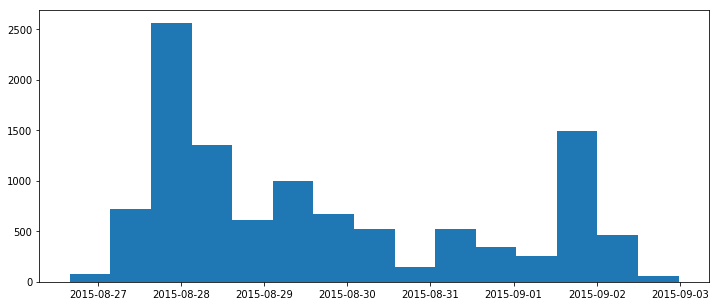

In [32]:
plt.figure(figsize=(12, 5))


plt.hist(df._last_judgment_at, bins= 15);

In [33]:
df.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'choose_one', 'confidence', 'choose_one_gold',
       'keyword', 'location', 'text', 'tweetid', 'userid'],
      dtype='object')

Median value for `df['confidence]` is $0.8$, so this can be our cut off point.

In [34]:
df['80_pct_conf'] = df['confidence'].apply(lambda x: 1 if x > .805 else 0)

In [35]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,choose_one,confidence,choose_one_gold,keyword,location,text,tweetid,userid,80_pct_conf
0,778244862,False,finalized,5,2015-08-26 15:56:00,Relevant,1.0000,NaN,ablaze,London,Birmingham Wholesale Market is ablaze BBC News...,6.290000e+17,2.980940e+09,1
1,778244863,False,finalized,5,2015-08-28 19:14:00,Not Relevant,1.0000,NaN,ablaze,Niall's place | SAF 12 SQUAD |,@sunkxssedharry will you wear shorts for race ...,6.290000e+17,1.386536e+09,1
2,778244864,False,finalized,5,2015-08-29 01:27:00,Relevant,0.8013,NaN,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,6.290000e+17,1.942629e+08,0
3,778244865,False,finalized,5,2015-08-26 16:31:00,Not Relevant,1.0000,NaN,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,6.290000e+17,9.447200e+08,1
4,778244866,False,finalized,5,2015-08-26 17:19:00,Relevant,0.6013,NaN,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,6.290000e+17,2.858859e+09,0


In [36]:
tweets = df.drop(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'choose_one', 'confidence', 'choose_one_gold',
       'keyword', 'location', 'tweetid', 'userid'], axis=1)

In [37]:
tweets.head()

,text,80_pct_conf
0,Birmingham Wholesale Market is ablaze BBC News...,1
1,@sunkxssedharry will you wear shorts for race ...,1
2,@bbcmtd Wholesale Markets ablaze http://t.co/l...,0
3,We always try to bring the heavy. #metal #RT h...,1
4,#AFRICANBAZE: Breaking news:Nigeria flag set a...,0


In [38]:
#already created in a previous session
#tweets.to_csv('./tweets.csv', index = False)

In [39]:
df.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'choose_one', 'confidence', 'choose_one_gold',
       'keyword', 'location', 'text', 'tweetid', 'userid', '80_pct_conf'],
      dtype='object')

In [40]:
cleaned_df = df.drop(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       'confidence', 'choose_one_gold',
       'tweetid', 'userid'], axis = 1)
cleaned_df.head()

,_last_judgment_at,choose_one,keyword,location,text,80_pct_conf
0,2015-08-26 15:56:00,Relevant,ablaze,London,Birmingham Wholesale Market is ablaze BBC News...,1
1,2015-08-28 19:14:00,Not Relevant,ablaze,Niall's place | SAF 12 SQUAD |,@sunkxssedharry will you wear shorts for race ...,1
2,2015-08-29 01:27:00,Relevant,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,0
3,2015-08-26 16:31:00,Not Relevant,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,1
4,2015-08-26 17:19:00,Relevant,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,0


In [41]:
cleaned_df.rename({'_last_judgment_at': 'final_judgement_time'}, axis=1, inplace=True)

In [48]:
other_cleaned = cleaned_df.drop(['final_judgement_time', 'location',
       '80_pct_conf'], axis = 1)

In [55]:
#import additional tweets
additional = pd.read_csv('./Addtnl_300_clean.csv')
additional.head()

,tweet,if_alert_worthy
0,At least 168 killed when #tsunami hits beaches...,1
1,"At least 43 people killed, 584 others wounded,...",1
2,Another disaster hitting #Indonesia bringing l...,1
3,concert hit by #Tsunami #Indonesia #seventeenb...,1
4,A #Tsunami triggered by a volcano has hit coas...,1


In [52]:
#Extract the tsunami tweets
tsunami = other_cleaned[other_cleaned['keyword'] == 'tsunami']


<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 9912 to 9961
Data columns (total 3 columns):
choose_one    50 non-null object
keyword       50 non-null object
text          50 non-null object
dtypes: object(3)
memory usage: 1.6+ KB


In [57]:
tsunami = tsunami.reset_index(drop =True)

In [61]:
#Classify relevant/non relevant
tsunami.rename({'choose_one': 'tsunami', 'text': 'tweet'}, axis=1, inplace=True)

In [63]:
additional.rename({'if_alert_worthy': 'tsunami'}, axis = 1, inplace = True)

In [65]:
additional.head()

,tweet,tsunami
0,At least 168 killed when #tsunami hits beaches...,1
1,"At least 43 people killed, 584 others wounded,...",1
2,Another disaster hitting #Indonesia bringing l...,1
3,concert hit by #Tsunami #Indonesia #seventeenb...,1
4,A #Tsunami triggered by a volcano has hit coas...,1


In [67]:
tsunami.drop('keyword', axis=1, inplace = True)


0     0
1     0
2     1
3     1
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    1
12    1
13    0
14    1
15    0
16    0
17    1
18    1
19    0
20    1
21    0
22    0
23    0
24    0
25    0
26    0
27    1
28    0
29    0
30    1
31    1
32    0
33    1
34    1
35    0
36    0
37    0
38    1
39    0
40    0
41    1
42    0
43    1
44    0
45    0
46    0
47    0
48    0
49    1
Name: tsunami, dtype: int64

In [68]:
tsunami['tsunami'] = tsunami['tsunami'].map({'Relevant': 1, 'Not Relevant': 0})

In [70]:
combined = pd.concat([tsunami, additional])

/Users/edithiyerhernandez/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [71]:
combined.reset_index(drop=True, inplace=True)

In [72]:
combined.head()

,tsunami,tweet
0,0,I feel so lucky rn
1,0,@AshNiggas tink ...
2,1,So did we have a hurricane tornado tsunami? So...
3,1,@helene_yancey GodsLove &amp; #thankU my siste...
4,0,I liked a @YouTube video from @team0epiphany h...


In [73]:
combined.to_csv('./combined_df.csv', index = False)

In [43]:
cleaned_df.to_csv('./cleaned_df.csv')

In [44]:
cleaned_df['final_judgement_time'] = cleaned_df.final_judgement_time.dt.date
cleaned_df.head()

,final_judgement_time,choose_one,keyword,location,text,80_pct_conf
0,2015-08-26,Relevant,ablaze,London,Birmingham Wholesale Market is ablaze BBC News...,1
1,2015-08-28,Not Relevant,ablaze,Niall's place | SAF 12 SQUAD |,@sunkxssedharry will you wear shorts for race ...,1
2,2015-08-29,Relevant,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,0
3,2015-08-26,Not Relevant,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,1
4,2015-08-26,Relevant,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,0


In [52]:
cleaned_df.set_index('final_judgement_time', drop=True)

,keyword,location,text,80_pct_conf
final_judgement_time,,,,
2015-08-26,ablaze,London,Birmingham Wholesale Market is ablaze BBC News...,1
2015-08-28,ablaze,Niall's place | SAF 12 SQUAD |,@sunkxssedharry will you wear shorts for race ...,1
2015-08-29,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,0
2015-08-26,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,1
2015-08-26,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,0
2015-08-26,ablaze,NIGERIA,#PreviouslyOnDoyinTv: Toke Makinwaäó»s marriag...,1
2015-08-26,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,1
2015-08-26,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
2015-08-28,ablaze,Pretoria,@PhDSquares #mufc they've built so much hype a...,0


In [155]:
pd.read_csv('./tuunamiTweets.csv')

,Unnamed: 0,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
0,1,RT @WAVE_BC: #Tsunami Information issued by #N...,False,0,NaN,2019-01-10 00:15:59,False,NaN,1083155458016272385,NaN,"<a href=""http://twitter.com/download/android"" ...",Flexibletree67,1,True,False,NaN,NaN
1,2,#Tsunami Information issued by #NTWC for M4.0 ...,False,2,NaN,2019-01-10 00:15:48,False,NaN,1083155411522342914,NaN,"<a href=""http://tsunamiwave.ca/"" rel=""nofollow...",WAVE_BC,1,False,False,NaN,NaN
2,3,RT @David_Bressan: According to a #Chinese stu...,False,0,NaN,2019-01-10 00:00:56,False,NaN,1083151669884522496,NaN,"<a href=""http://twitter.com/download/android"" ...",mihai_necula,14,True,False,NaN,NaN
3,4,"In 2004, a 9.3 #earthquake &amp; #tsunami stru...",False,0,NaN,2019-01-09 23:21:01,True,NaN,1083141622274105344,NaN,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",doomalert19,0,False,False,NaN,NaN
4,5,RT @maximaxoo: #History #Science: #dinosaur-ki...,False,0,NaN,2019-01-09 22:59:33,False,NaN,1083136220690042880,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",xandaolp,7,True,False,NaN,NaN
5,6,#Tsunami of #sewage from 'human error' caused ...,False,0,NaN,2019-01-09 22:52:10,False,NaN,1083134364626632710,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",SueBarkoBlogz,0,False,False,NaN,NaN
6,7,"#Rain, #Hail, Snow, #earthquake, #Fire #tsunam...",False,0,NaN,2019-01-09 22:20:44,True,NaN,1083126451149381638,NaN,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",doomalert19,0,False,False,NaN,NaN
7,8,RT @NESTA_US: How can a land-based #volcano ca...,False,0,NaN,2019-01-09 21:39:07,False,NaN,1083115978077147146,NaN,"<a href=""http://twitter.com/download/android"" ...",FitzGeography,1360,True,False,NaN,NaN
8,9,"#Rain, #Hail, Snow, #earthquake, #Fire #tsunam...",False,0,NaN,2019-01-09 21:37:23,True,NaN,1083115545120198662,NaN,"<a href=""http://instagram.com"" rel=""nofollow"">...",doomalert19,0,False,False,NaN,NaN
9,10,#tsunami #earthquake Disaster Preparedness : A...,False,0,NaN,2019-01-09 21:21:13,True,NaN,1083111475558928384,NaN,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",doomalert19,0,False,False,NaN,NaN


In [156]:
pd.read_csv('./facebookChris.csv')

,Unnamed: 0,from_id,from_name,message,created_time,type,link,id,story,likes_count,comments_count,shares_count
0,1,9795912450,University of Southern Maine,"Winter Weather Closure: January 9, 2019\r\nThe...",2019-01-09T11:01:18+0000,status,NaN,9795912450_10157001292107451,NaN,4,0,2
1,2,9795912450,University of Southern Maine,"With classes starting on Jan. 22, we'd like to...",2019-01-08T18:02:24+0000,photo,https://www.facebook.com/usmbookstore/photos/a...,9795912450_10156999942952451,University of Southern Maine shared a post.,5,1,0
2,3,9795912450,University of Southern Maine,Are you interested in how communities are addr...,2019-01-08T15:38:35+0000,photo,https://www.facebook.com/USouthernMaine/photos...,9795912450_10156999612447451,NaN,4,0,1
3,4,9795912450,University of Southern Maine,Check out this opportunity to learn a local in...,2019-01-03T18:31:28+0000,link,https://en.iyil2019.org/,9795912450_10156988669282451,NaN,30,2,10
4,5,9795912450,University of Southern Maine,We're proud of our School of Music's Chamber S...,2019-01-02T21:30:00+0000,photo,https://www.facebook.com/USouthernMaine/photos...,9795912450_10156986750062451,NaN,31,1,3
5,6,9795912450,University of Southern Maine,What an incredible year it has been. From all ...,2018-12-31T19:40:08+0000,photo,https://www.facebook.com/USouthernMaine/photos...,9795912450_10156981661217451,NaN,20,1,1
6,7,9795912450,University of Southern Maine,"We’re so old, we forgot our own birthday. Yest...",2018-12-27T17:01:46+0000,photo,https://www.facebook.com/USouthernMaine/photos...,9795912450_10156972485667451,NaN,64,0,5
7,8,9795912450,University of Southern Maine,"We hope everyone had a Merry Christmas, happy ...",2018-12-27T16:55:41+0000,photo,https://www.facebook.com/USouthernMaine/photos...,9795912450_10156972476772451,NaN,18,0,1
8,9,9795912450,University of Southern Maine,NaN,2018-12-21T17:32:40+0000,photo,https://www.facebook.com/USouthernMaine/photos...,9795912450_10156957144602451,University of Southern Maine updated their cov...,21,3,0
9,10,9795912450,University of Southern Maine,"We sit down with Julie Pike, editor-in-chief o...",2018-12-21T17:30:57+0000,video,https://www.facebook.com/USouthernMaine/videos...,9795912450_10156957139367451,NaN,2,1,0
